In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import theoryLyaP3D as tP3D

Populating the interactive namespace from numpy and matplotlib


In [2]:
# create theory object
theory=tP3D.TheoryLyaP3D()

In [3]:
# compute P3D at z=3, in the parallel (mu=0) and transverse (mu=1) directions
z=3.0
k=np.logspace(-4,0.9,1000)
pk_0=theory.FluxP3D_hMpc(z,k,np.zeros_like(k))
pk_1=theory.FluxP3D_hMpc(z,k,np.ones_like(k))
# compute also P3D ignoring non-linear corrections (Kaiser only)
pk_0_lin=theory.FluxP3D_hMpc(z,k,np.zeros_like(k),linear=True)
pk_1_lin=theory.FluxP3D_hMpc(z,k,np.ones_like(k),linear=True)

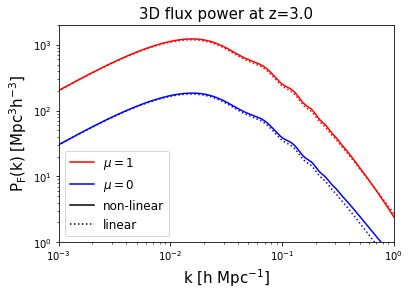

In [4]:
plt.ylim(1e0,2e3)
plt.xlim(1e-3,1e0)
plt.xlabel(r'k [h $\rm{Mpc}^{-1}$]',fontsize=15)
plt.ylabel(r'$\rm{P}_{\rm{F}}(k)$ [$\rm{Mpc}^3 \rm{h}^{-3}$]',fontsize=15)
plt.title(r'3D flux power at z='+str(z),fontsize=15)
plt.loglog(k,pk_1,color='red',ls='-',label=r'$\mu=1$')
plt.loglog(k,pk_0,color='blue',ls='-',label=r'$\mu=0$')
plt.loglog(k,pk_1_lin,color='red',ls=':')
plt.loglog(k,pk_0_lin,color='blue',ls=':')
plt.loglog([],[],color='black',ls='-',label='non-linear')
plt.loglog([],[],color='black',ls=':',label='linear')
plt.legend(loc='lower left',fontsize=12)
plt.show()

In [5]:
p1d = theory.FluxP1D_hMpc(z,k,0.01,0.01)
p1d_TH = theory.FluxP1D_hMpc(z,k,0.01,1.0)
p1d_G = theory.FluxP1D_hMpc(z,k,1.0,0.01)

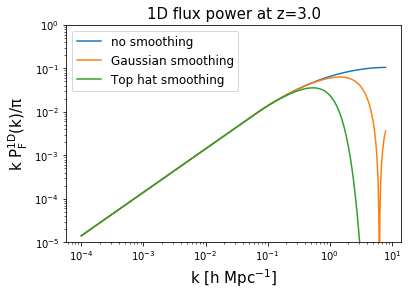

In [6]:
plt.ylim(1e-5,1)
plt.xlabel(r'k [h $\rm{Mpc}^{-1}$]',fontsize=15)
plt.ylabel(r'k $\rm{P}^{1D}_{\rm{F}}(k) / \pi $',fontsize=15)
plt.title(r'1D flux power at z='+str(z),fontsize=15)
plt.loglog(k,k*p1d/np.pi,label='no smoothing')
plt.loglog(k,k*p1d_TH/np.pi,label='Gaussian smoothing')
plt.loglog(k,k*p1d_G/np.pi,label='Top hat smoothing')
plt.legend(loc='upper left',fontsize=12)